In this chapter we cover
- Efficient markets hypothesis: strong form v. weak form
- Random walk
- persistence and regression to the mean
- Fundamental vs. Technical Analysis
- What the literature says: twitter+mood, momentum, january effect
- herd behavior, information cascades, private information, game theory
- red queen games
- trade people not prices - harder to uncover and more robust
- biases and errors: survivorship, data mining fallacy , stateful strategies

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [2]:
#!pip install pandas_datareader

In [3]:
import pandas_datareader as pdr

start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2016-03-01')

spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

spy

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,118944600,99.808658
2010-01-05,113.260002,113.680000,112.849998,113.629997,111579900,100.072861
2010-01-06,113.519997,113.989998,113.430000,113.709999,116074400,100.143318
2010-01-07,113.500000,114.330002,113.180000,114.190002,131091100,100.566052
2010-01-08,113.889999,114.620003,113.660004,114.570000,126402800,100.900712
2010-01-11,115.080002,115.129997,114.239998,114.730003,106375700,101.041626
2010-01-12,113.970001,114.209999,113.220001,113.660004,163333500,100.099287
2010-01-13,113.949997,114.940002,113.370003,114.620003,161822000,100.944749
2010-01-14,114.489998,115.139999,114.419998,114.930000,115718800,101.217761


In [4]:
spy_c = spy['Close']

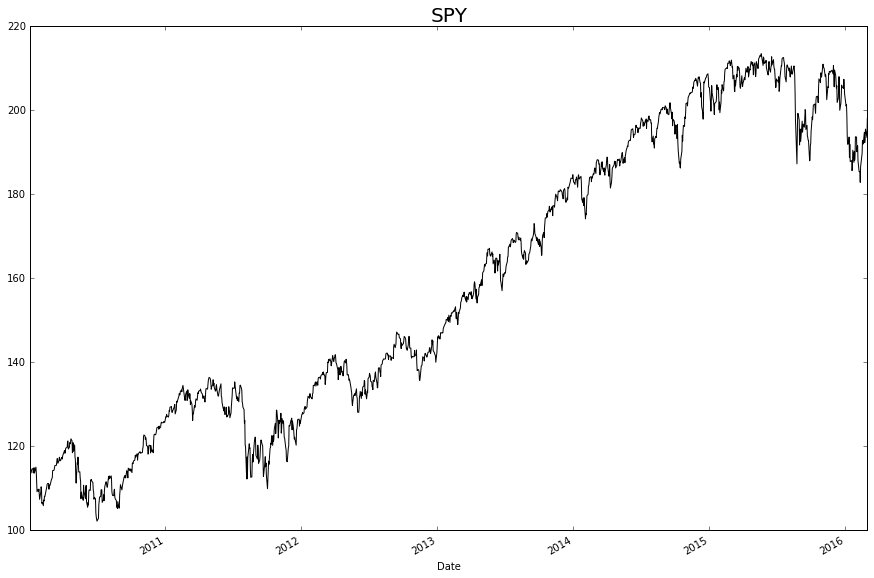

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20)

In [6]:
first_open = spy['Open'].iloc[0]
first_open

112.370003

In [7]:
last_close = spy['Close'].iloc[-1]
last_close

198.11000100000001

In [8]:
last_close - first_open

85.739998000000014

In [9]:
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])

In [10]:
spy['Daily Change'].sum()

43.36016700000019

In [11]:
np.std(spy['Daily Change'])

1.1464132429598644

In [12]:
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))

In [13]:
spy['Overnight Change'].sum()

42.379830999999825

In [14]:
np.std(spy['Overnight Change'])

0.9535980345281259

In [15]:
# daily returns
daily_rtn = ((spy['Close'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
daily_rtn

Date
2010-01-04         NaN
2010-01-05    0.264709
2010-01-06    0.070406
2010-01-07    0.422129
2010-01-08    0.332777
2010-01-11    0.139655
2010-01-12   -0.932624
2010-01-13    0.844623
2010-01-14    0.270456
2010-01-15   -1.122423
2010-01-19    1.249559
2010-01-20   -1.016860
2010-01-21   -1.922910
2010-01-22   -2.229184
2010-01-25    0.512772
2010-01-26   -0.419057
2010-01-27    0.475715
2010-01-28   -1.147229
2010-01-29   -1.086857
2010-02-01    1.555079
2010-02-02    1.210342
2010-02-03   -0.498274
2010-02-04   -3.086588
2010-02-05    0.206691
2010-02-08   -0.721925
2010-02-09    1.256022
2010-02-10   -0.195858
2010-02-11    1.046626
2010-02-12   -0.083229
2010-02-16    1.573489
                ...   
2016-01-19    0.133113
2016-01-20   -1.281508
2016-01-21    0.560198
2016-01-22    2.051530
2016-01-25   -1.511655
2016-01-26    1.364314
2016-01-27   -1.088324
2016-01-28    0.520914
2016-01-29    2.437735
2016-02-01   -0.036138
2016-02-02   -1.802215
2016-02-03    0.599495
2016-0

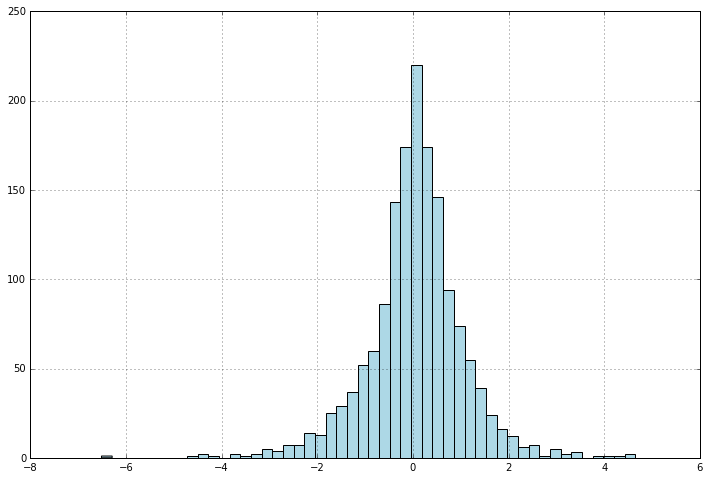

In [16]:
daily_rtn.hist(bins=50, color='lightblue', figsize=(12,8))

In [17]:
# intra day returns
id_rtn = ((spy['Close'] - spy['Open'])/spy['Open'])*100
id_rtn

Date
2010-01-04    0.854320
2010-01-05    0.326678
2010-01-06    0.167373
2010-01-07    0.607931
2010-01-08    0.597068
2010-01-11   -0.304135
2010-01-12   -0.271999
2010-01-13    0.587982
2010-01-14    0.384315
2010-01-15   -0.950060
2010-01-19    1.267378
2010-01-20   -0.341267
2010-01-21   -1.948737
2010-01-22   -1.789567
2010-01-25   -0.399240
2010-01-26   -0.027436
2010-01-27    0.604565
2010-01-28   -1.470190
2010-01-29   -1.513208
2010-02-01    0.841420
2010-02-02    1.025073
2010-02-03   -0.045500
2010-02-04   -2.330704
2010-02-05    0.093849
2010-02-08   -0.796327
2010-02-09    0.084014
2010-02-10   -0.037367
2010-02-11    1.178997
2010-02-12    0.981403
2010-02-16    0.808375
                ...   
2016-01-19   -1.000215
2016-01-20    0.335078
2016-01-21    0.257771
2016-01-22    0.389928
2016-01-25   -1.200505
2016-01-26    0.944697
2016-01-27   -0.764847
2016-01-28   -0.447466
2016-01-29    1.947162
2016-02-01    0.581725
2016-02-02   -0.937697
2016-02-03   -0.057469
2016-0

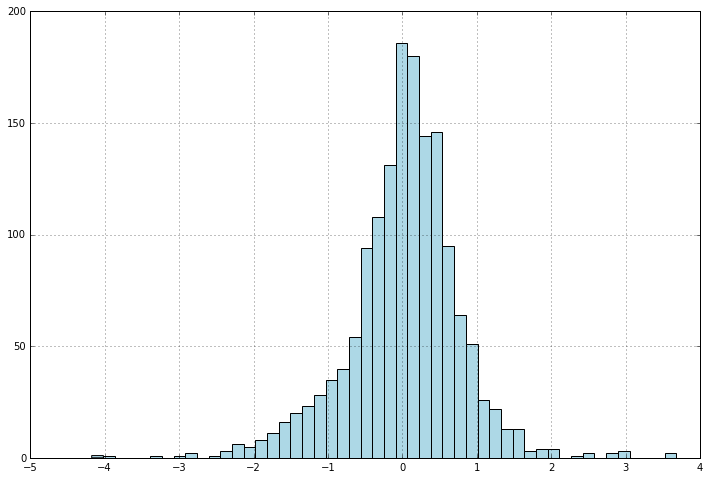

In [18]:
id_rtn.hist(bins=50, color='lightblue', figsize=(12,8))

In [19]:
# overnight returns
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
on_rtn

Date
2010-01-04         NaN
2010-01-05   -0.061767
2010-01-06   -0.096805
2010-01-07   -0.184679
2010-01-08   -0.262723
2010-01-11    0.445144
2010-01-12   -0.662427
2010-01-13    0.255141
2010-01-14   -0.113423
2010-01-15   -0.174016
2010-01-19   -0.017596
2010-01-20   -0.677906
2010-01-21    0.026340
2010-01-22   -0.447628
2010-01-25    0.915667
2010-01-26   -0.391729
2010-01-27   -0.128076
2010-01-28    0.327779
2010-01-29    0.432901
2010-02-01    0.707704
2010-02-02    0.183389
2010-02-03   -0.452981
2010-02-04   -0.773922
2010-02-05    0.112736
2010-02-08    0.074999
2010-02-09    1.171025
2010-02-10   -0.158551
2010-02-11   -0.130828
2010-02-12   -1.054286
2010-02-16    0.758978
                ...   
2016-01-19    1.144779
2016-01-20   -1.611187
2016-01-21    0.301650
2016-01-22    1.655149
2016-01-25   -0.314931
2016-01-26    0.415689
2016-01-27   -0.325970
2016-01-28    0.972733
2016-01-29    0.481203
2016-02-01   -0.614290
2016-02-02   -0.872702
2016-02-03    0.657341
2016-0

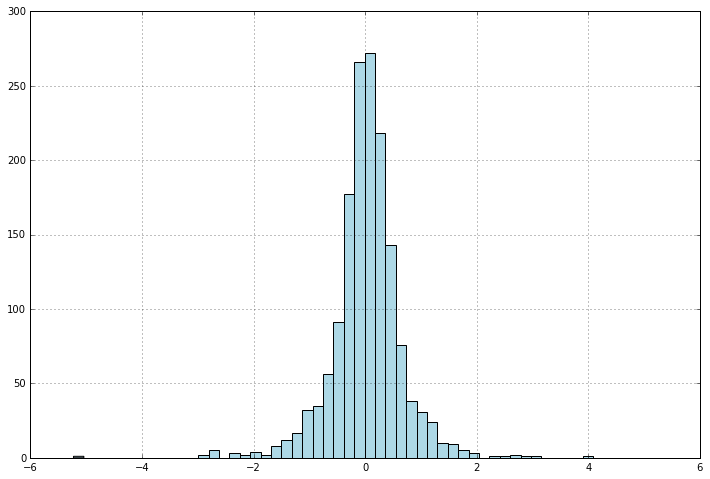

In [20]:
on_rtn.hist(bins=50, color='lightblue', figsize=(12,8))

In [93]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('Trades:', cnt,\
          '\nWins:', wins,\
          '\nLosses:', losses,\
          '\nBreakeven:', evens,\
          '\nWin/Loss Ratio', win_r,\
          '\nMean Win:', mean_w,\
          '\nMean Loss:', mean_l,\
          '\nMean', mean_trd,\
          '\nStd Dev:', sd,\
          '\nMax Loss:', max_l,\
          '\nMax Win:', max_w,\
          '\nSharpe Ratio:', sharpe_r)

In [94]:
get_stats(daily_rtn)

Trades: 1549 
Wins: 844 
Losses: 699 
Breakeven: 6 
Win/Loss Ratio 1.207 
Mean Win: 0.691 
Mean Loss: -0.743 
Mean 0.041 
Std Dev: 1.009 
Max Loss: -6.512 
Max Win: 4.65 
Sharpe Ratio: 0.6477


In [95]:
get_stats(id_rtn)

Trades: 1550 
Wins: 851 
Losses: 689 
Breakeven: 10 
Win/Loss Ratio 1.235 
Mean Win: 0.517 
Mean Loss: -0.59 
Mean 0.021 
Std Dev: 0.758 
Max Loss: -4.175 
Max Win: 3.683 
Sharpe Ratio: 0.4472


In [96]:
get_stats(on_rtn)

Trades: 1549 
Wins: 821 
Losses: 720 
Breakeven: 8 
Win/Loss Ratio 1.14 
Mean Win: 0.421 
Mean Loss: -0.437 
Mean 0.02 
Std Dev: 0.63 
Max Loss: -5.227 
Max Win: 4.09 
Sharpe Ratio: 0.5071


In [86]:
def get_signal(x):
    val = np.random.rand()
    if val > .5:
        return 1
    else:
        return 0

In [ ]:
for i in range(1000):
    spy['Signal_' + str(i)] = spy.apply(get_signal, axis=1)

In [ ]:
spy

In [74]:
#spy.to_csv('/Users/alexcombs/Downloads/spy.csv', index=False)
spy = pd.read_csv('/Users/alexcombs/Downloads/spy.csv')
#spy.drop([x for x in spy.columns is 'Signal' in x])

In [98]:
sumd={}
for i in range(1000):
    sumd.update({i: np.where(spy['Signal_' + str(i)].iloc[1:]==1, spy['Overnight Change'].iloc[1:],0).sum()})

In [99]:
returns = pd.Series(sumd).to_frame('return').sort_values('return', ascending=0)

In [100]:
returns

,return
270,107.879857
41,81.300046
198,81.239830
827,75.649858
656,75.329968
575,74.319997
976,74.209683
574,73.629886
595,70.890223
994,69.849832


In [101]:
mystery_rtn = pd.Series(np.where(spy['Signal_270'].iloc[1:]==1,spy['Overnight Change'].iloc[1:],0))

In [102]:
get_stats(mystery_rtn)

Trades: 1549 
Wins: 454 
Losses: 340 
Breakeven: 755 
Win/Loss Ratio 1.335 
Mean Win: 0.684 
Mean Loss: -0.597 
Mean 0.07 
Std Dev: 0.663 
Max Loss: -3.46 
Max Win: 5.93 
Sharpe Ratio: 1.6675


In [476]:
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2016-03-01')

sp = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

In [477]:
sp

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,8164300,107.543167
2000-01-04,143.531204,144.062500,139.640594,139.750000,8089800,103.337568
2000-01-05,139.937500,141.531204,137.250000,140.000000,12177900,103.522429
2000-01-06,139.625000,141.500000,137.750000,137.750000,6227200,101.858676
2000-01-07,140.312500,145.750000,140.062500,145.750000,8066500,107.774244
2000-01-10,146.250000,146.906204,145.031204,146.250000,5741700,108.143966
2000-01-11,145.812500,146.093704,143.500000,144.500000,7503700,106.849936
2000-01-12,144.593704,144.593704,142.875000,143.062500,6907700,105.786983
2000-01-13,144.468704,145.750000,143.281204,145.000000,5158300,107.219659


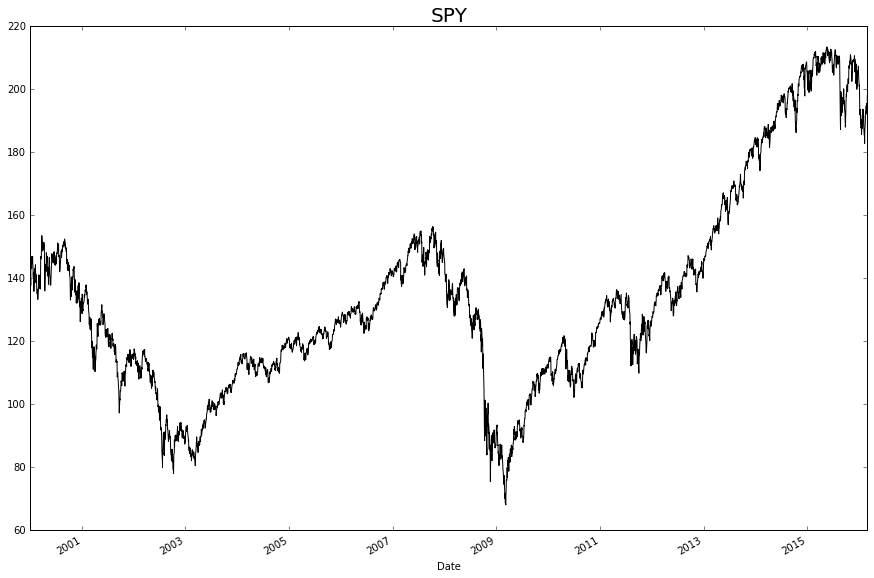

In [800]:
fig, ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY", fontsize=20)

In [495]:
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [506]:
(sp['Close'] - sp['Close'].shift(1)).sum()

52.67250100000001

In [496]:
get_stats(long_day_rtn)

Trades: 4064 
Wins: 2168 
Losses: 1881 
Breakeven: 15 
Win/Loss Ratio 1.153 
Mean Win: 0.819 
Mean Loss: -0.91 
Mean 0.016 
Std Dev: 1.275 
Max Loss: -9.845 
Max Win: 14.52 
Sharpe Ratio: 0.1958


In [501]:
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100

In [505]:
(sp['Close'] - sp['Open']).sum()

-36.91226699999963

In [502]:
get_stats(long_id_rtn)

Trades: 4065 
Wins: 2128 
Losses: 1908 
Breakeven: 29 
Win/Loss Ratio 1.115 
Mean Win: 0.686 
Mean Loss: -0.766 
Mean -0.0 
Std Dev: 1.052 
Max Loss: -8.991 
Max Win: 8.435 
Sharpe Ratio: -0.0063


In [518]:
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [519]:
(sp['Open'] - sp['Close'].shift(1)).sum()

86.77226799999964

In [520]:
get_stats(long_on_rtn)

Trades: 4064 
Wins: 2152 
Losses: 1878 
Breakeven: 34 
Win/Loss Ratio 1.146 
Mean Win: 0.436 
Mean Loss: -0.466 
Mean 0.016 
Std Dev: 0.696 
Max Loss: -8.322 
Max Win: 6.068 
Sharpe Ratio: 0.3541


In [521]:
for i in range(1, 21, 1):
    sp.loc[:,'Close Minus ' + str(i)] = sp['Close'].shift(i)

In [523]:
sp

,Open,High,Low,Close,Volume,Adj Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,8164300,107.543167,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,143.531204,144.062500,139.640594,139.750000,8089800,103.337568,145.437500,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,139.937500,141.531204,137.250000,140.000000,12177900,103.522429,139.750000,145.437500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,139.625000,141.500000,137.750000,137.750000,6227200,101.858676,140.000000,139.750000,145.437500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,140.312500,145.750000,140.062500,145.750000,8066500,107.774244,137.750000,140.000000,139.750000,145.437500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,146.250000,146.906204,145.031204,146.250000,5741700,108.143966,145.750000,137.750000,140.000000,139.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,145.812500,146.093704,143.500000,144.500000,7503700,106.849936,146.250000,145.750000,137.750000,140.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-12,144.593704,144.593704,142.875000,143.062500,6907700,105.786983,144.500000,146.250000,145.750000,137.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-13,144.468704,145.750000,143.281204,145.000000,5158300,107.219659,143.062500,144.500000,146.250000,145.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [526]:
sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]

In [527]:
sp20

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343704,144.437500,144.750000,147.000000,...,146.968704,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343704,144.437500,144.750000,...,145.812500,146.968704,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343704,144.437500,...,147.000000,145.812500,146.968704,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593704,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343704,...,144.750000,147.000000,145.812500,146.968704,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
2000-02-07,142.375000,142.593704,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,...,144.437500,144.750000,147.000000,145.812500,146.968704,145.000000,143.062500,144.500000,146.250000,145.750000
2000-02-08,144.312500,142.375000,142.593704,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,...,140.343704,144.437500,144.750000,147.000000,145.812500,146.968704,145.000000,143.062500,144.500000,146.250000
2000-02-09,141.281204,144.312500,142.375000,142.593704,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,...,141.937500,140.343704,144.437500,144.750000,147.000000,145.812500,146.968704,145.000000,143.062500,144.500000
2000-02-10,141.562500,141.281204,144.312500,142.375000,142.593704,143.187500,141.062500,140.937500,139.562500,135.875000,...,140.812500,141.937500,140.343704,144.437500,144.750000,147.000000,145.812500,146.968704,145.000000,143.062500
2000-02-11,138.687500,141.562500,141.281204,144.312500,142.375000,142.593704,143.187500,141.062500,140.937500,139.562500,...,140.250000,140.812500,141.937500,140.343704,144.437500,144.750000,147.000000,145.812500,146.968704,145.000000


In [528]:
sp20 = sp20.iloc[:,::-1]

In [529]:
sp20

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968704,...,147.000000,144.750000,144.437500,140.343704,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968704,145.812500,...,144.750000,144.437500,140.343704,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968704,145.812500,147.000000,...,144.437500,140.343704,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968704,145.812500,147.000000,144.750000,...,140.343704,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593704
2000-02-07,145.750000,146.250000,144.500000,143.062500,145.000000,146.968704,145.812500,147.000000,144.750000,144.437500,...,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593704,142.375000
2000-02-08,146.250000,144.500000,143.062500,145.000000,146.968704,145.812500,147.000000,144.750000,144.437500,140.343704,...,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593704,142.375000,144.312500
2000-02-09,144.500000,143.062500,145.000000,146.968704,145.812500,147.000000,144.750000,144.437500,140.343704,141.937500,...,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593704,142.375000,144.312500,141.281204
2000-02-10,143.062500,145.000000,146.968704,145.812500,147.000000,144.750000,144.437500,140.343704,141.937500,140.812500,...,135.875000,139.562500,140.937500,141.062500,143.187500,142.593704,142.375000,144.312500,141.281204,141.562500
2000-02-11,145.000000,146.968704,145.812500,147.000000,144.750000,144.437500,140.343704,141.937500,140.812500,140.250000,...,139.562500,140.937500,141.062500,143.187500,142.593704,142.375000,144.312500,141.281204,141.562500,138.687500


In [486]:
from sklearn.svm import SVR

In [487]:
clf = SVR(kernel='linear')

In [530]:
len(sp20)

4045

In [753]:
X_train = sp20[:-2000]
y_train = sp20['Close'].shift(-1)[:-2000]

In [754]:
X_test = sp20[-2000:-1000]
y_test = sp20['Close'].shift(-1)[-2000:-1000]

In [755]:
model = clf.fit(X_train, y_train)

In [756]:
preds = model.predict(X_test)

In [757]:
preds

array([ 133.96663158,  134.74801978,  133.20610665,  133.42167823,
        131.77392251,  131.69608042,  136.04094308,  136.66560588,
        137.70919425,  136.96974234,  136.65886116,  136.66687006,
        136.1206777 ,  135.78692222,  133.63023192,  133.29450387,
        133.48191142,  137.07775857,  136.87812626,  138.1139977 ,
        138.45334432,  138.20929212,  137.80096538,  138.03085313,
        139.25722595,  139.26170942,  139.20619916,  138.47340777,
        141.37867322,  141.31073335,  140.77823121,  141.92548714,
        139.90330853,  139.45206746,  139.02553261,  140.44940891,
        140.32716985,  140.71751593,  142.40306857,  142.89505193,
        143.20989339,  141.65419151,  139.60745982,  139.56702393,
        137.90635987,  138.87538269,  139.52662629,  140.03915226,
        140.38574196,  139.15407903,  138.4626301 ,  138.08449349,
        140.52128488,  136.35477654,  136.92531376,  136.16047058,
        134.34325923,  134.57869876,  136.13486285,  136.35789

In [758]:
len(preds)

1000

In [759]:
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close', 'Predicted Next Close'], index=y_test.index)

In [760]:
tf

,Next Day Close,Predicted Next Close
Date,,
2008-03-24,134.850006,133.966632
2008-03-25,133.199997,134.748020
2008-03-26,132.779999,133.206107
2008-03-27,131.509995,133.421678
2008-03-28,131.970001,131.773923
2008-03-31,136.610001,131.696080
2008-04-01,136.699997,136.040943
2008-04-02,137.039993,136.665606
2008-04-03,136.889999,137.709194


In [761]:
cdc = sp[['Close']].iloc[-2000:-1000]
ndo = sp[['Open']].iloc[-2000:-1000].shift(-1)

In [762]:
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

In [763]:
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2008-03-24,134.850006,133.966632,134.720001,134.860001
2008-03-25,133.199997,134.748020,134.850006,134.460007
2008-03-26,132.779999,133.206107,133.199997,134.199997
2008-03-27,131.509995,133.421678,132.779999,132.990005
2008-03-28,131.970001,131.773923,131.509995,131.289993
2008-03-31,136.610001,131.696080,131.970001,133.610001
2008-04-01,136.699997,136.040943,136.610001,137.050003
2008-04-02,137.039993,136.665606,136.699997,135.960007
2008-04-03,136.889999,137.709194,137.039993,137.119995


In [772]:
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 0
    else:
        return 1

In [773]:
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0

In [774]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))

In [775]:
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2008-03-24,134.850006,133.966632,134.720001,134.860001,1,-0.007411
2008-03-25,133.199997,134.748020,134.850006,134.460007,1,-0.937089
2008-03-26,132.779999,133.206107,133.199997,134.199997,1,-1.058121
2008-03-27,131.509995,133.421678,132.779999,132.990005,1,-1.112873
2008-03-28,131.970001,131.773923,131.509995,131.289993,1,0.517944
2008-03-31,136.610001,131.696080,131.970001,133.610001,1,2.245341
2008-04-01,136.699997,136.040943,136.610001,137.050003,1,-0.255386
2008-04-02,137.039993,136.665606,136.699997,135.960007,1,0.794341
2008-04-03,136.889999,137.709194,137.039993,137.119995,1,-0.167733


In [779]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

33.60002899999989

In [780]:
(sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000]).sum()

-7.089998000000051

In [783]:
get_stats((sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000])/sp['Open'].iloc[-2000:-1000] * 100)

Trades: 1000 
Wins: 532 
Losses: 459 
Breakeven: 9 
Win/Loss Ratio 1.159 
Mean Win: 0.851 
Mean Loss: -0.975 
Mean 0.005 
Std Dev: 1.366 
Max Loss: -8.991 
Max Win: 7.968 
Sharpe Ratio: 0.0581


In [784]:
get_stats(tf2['PnL'])

Trades: 999 
Wins: 474 
Losses: 388 
Breakeven: 137 
Win/Loss Ratio 1.222 
Mean Win: 0.775 
Mean Loss: -0.833 
Mean 0.044 
Std Dev: 1.108 
Max Loss: -8.991 
Max Win: 7.968 
Sharpe Ratio: 0.6336


In [804]:
#!pip install fastdtw

In [838]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def dtw_dist(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [813]:
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [814]:
len(tseries)

812

In [839]:
tseries[0]

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [822]:
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [823]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])

In [831]:
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)

In [832]:
sfe = sf[sf['A']<sf['B']]

In [833]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]

In [834]:
winf

,A,B,Dist,A Ret,B Ret
3312,4,69,0.778629,1.360843,-1.696072
3439,4,196,0.608377,1.360843,0.410595
3609,4,366,0.973193,1.360843,0.040522
3790,4,547,0.832545,1.360843,-1.447712
3891,4,648,0.548913,1.360843,-0.510458
4035,4,792,0.719260,1.360843,0.819056
5463,6,598,0.678313,1.180863,2.896685
5489,6,624,0.897108,1.180863,0.757222
7769,9,471,0.932647,2.333028,-0.212983
13002,16,27,0.849448,0.754885,-0.571339


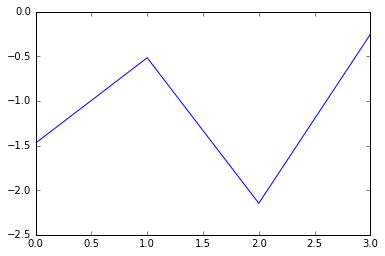

In [850]:
plt.plot(np.arange(4), tseries[6][0])

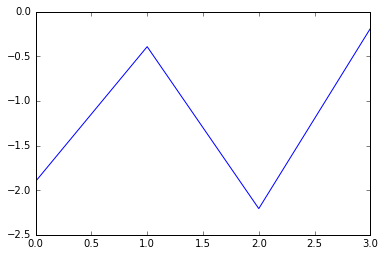

In [851]:
plt.plot(np.arange(4), tseries[598][0])

In [852]:
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

In [853]:
winf.apply(get_returns, axis=1);

In [854]:
get_stats(pd.Series(return_list))

Trades: 569 
Wins: 352 
Losses: 217 
Breakeven: 0 
Win/Loss Ratio 1.622 
Mean Win: 0.572 
Mean Loss: -0.646 
Mean 0.108 
Std Dev: 0.818 
Max Loss: -2.999 
Max Win: 3.454 
Sharpe Ratio: 2.0877
